In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/ethompson17/Explorer_Analytics/main/orders_export_1.csv')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

## Dirty Data

In [2]:
df.head(3)

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At
0,#1081,NaN,paid,2022-04-06 21:52:40 -0400,fulfilled,2022-04-07 12:20:58 -0400,no,USD,35.0,2.74,0.0,37.74,NaN,0.0,Expedited (USPS) 1-4 Days,2022-04-06 21:52:39 -0400,1,White R Hepler Hoodie - S,35.0,NaN,NaN,True,True,fulfilled,Deric Kenne,547 Symphony Way,547 Symphony Way,NaN,NaN,Wadsworth,44281,OH,US,NaN,Deric Kenne,547 Symphony Way,547 Symphony Way,NaN,NaN,Wadsworth,44281,OH,US,NaN,NaN,NaN,NaN,Shopify Payments,c24005816451236.1,0.0,ExplorerClothing,0.0,NaN,NaN,NaN,4.541752e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330631e+10,NaN,NaN,Ohio,Ohio,NaN,NaN,NaN
1,#1080,NaN,paid,NaN,fulfilled,2022-02-15 10:41:34 -0500,no,USD,0.0,0.00,0.0,0.00,anthony100,35.0,Standard (USPS) 5-7 Days,2022-02-14 23:36:42 -0500,1,Explorer Vintage Crewnecks - S,35.0,NaN,NaN,True,True,fulfilled,Anthony Gattoni,12058 Chandler Drive,12058 Chandler Drive,NaN,NaN,Plymouth,48170,MI,US,NaN,Anthony Gattoni,12058 Chandler Drive,12058 Chandler Drive,NaN,NaN,Plymouth,48170,MI,US,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ExplorerClothing,0.0,NaN,NaN,NaN,4.473488e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.734377e+10,NaN,NaN,Michigan,Michigan,NaN,NaN,NaN
2,#1079,NaN,paid,2021-12-13 19:43:08 -0500,fulfilled,2021-12-14 14:04:03 -0500,no,USD,35.0,0.00,2.1,37.10,NaN,0.0,Standard (USPS) 5-7 Days,2021-12-13 19:43:07 -0500,1,Explorer Vintage Crewnecks - L,35.0,NaN,NaN,True,True,fulfilled,Eli Smith,11162 Rivendell Court,11162 Rivendell Court,NaN,NaN,Pinckney,48169,MI,US,NaN,Eli Smith,11162 Rivendell Court,11162 Rivendell Court,NaN,NaN,Pinckney,48169,MI,US,NaN,NaN,NaN,NaN,Shopify Payments,c22866461687972.1,0.0,ExplorerClothing,0.0,NaN,NaN,NaN,4.380866e+12,NaN,Low,web,0.0,Michigan State Tax 6%,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.734883e+10,NaN,NaN,Michigan,Michigan,NaN,NaN,NaN


# Removing Completely Null Columns

In [13]:
newdf=df
for column in newdf.columns: 
    if df[column].count() == 0: 
        df=df.drop(column, axis=1)

# Create Item Type Column

In [14]:
conditions = [(newdf['Lineitem name'].str.contains('Hat')),
              (newdf['Lineitem name'].str.contains('Hoodie')),
              (newdf['Lineitem name'].str.contains('Crewneck')),
              (newdf['Lineitem name'].str.contains('Sweatshirt'))
             ]

values = ['Hat', 'Hoodie', 'Crewneck', 'Hoodie']

newdf['Item Type'] = np.select(conditions, values)

newdf['Item Type'] = newdf['Item Type'].replace({'0': np.nan})

# New Data Frame

In [15]:
newdf.head(3)

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Id,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Phone,Billing Province Name,Shipping Province Name,Item Type
0,#1081,NaN,paid,2022-04-06 21:52:40 -0400,fulfilled,2022-04-07 12:20:58 -0400,no,USD,35.0,2.74,0.0,37.74,NaN,0.0,Expedited (USPS) 1-4 Days,2022-04-06 21:52:39 -0400,1,White R Hepler Hoodie - S,35.0,NaN,True,True,fulfilled,Deric Kenne,547 Symphony Way,547 Symphony Way,NaN,NaN,Wadsworth,44281,OH,US,NaN,Deric Kenne,547 Symphony Way,547 Symphony Way,NaN,NaN,Wadsworth,44281,OH,US,NaN,NaN,Shopify Payments,c24005816451236.1,0.0,ExplorerClothing,0.0,4.541752e+12,Low,web,0.0,NaN,NaN,1.330631e+10,Ohio,Ohio,Hoodie
1,#1080,NaN,paid,NaN,fulfilled,2022-02-15 10:41:34 -0500,no,USD,0.0,0.00,0.0,0.00,anthony100,35.0,Standard (USPS) 5-7 Days,2022-02-14 23:36:42 -0500,1,Explorer Vintage Crewnecks - S,35.0,NaN,True,True,fulfilled,Anthony Gattoni,12058 Chandler Drive,12058 Chandler Drive,NaN,NaN,Plymouth,48170,MI,US,NaN,Anthony Gattoni,12058 Chandler Drive,12058 Chandler Drive,NaN,NaN,Plymouth,48170,MI,US,NaN,NaN,NaN,NaN,0.0,ExplorerClothing,0.0,4.473488e+12,Low,web,0.0,NaN,NaN,1.734377e+10,Michigan,Michigan,Crewneck
2,#1079,NaN,paid,2021-12-13 19:43:08 -0500,fulfilled,2021-12-14 14:04:03 -0500,no,USD,35.0,0.00,2.1,37.10,NaN,0.0,Standard (USPS) 5-7 Days,2021-12-13 19:43:07 -0500,1,Explorer Vintage Crewnecks - L,35.0,NaN,True,True,fulfilled,Eli Smith,11162 Rivendell Court,11162 Rivendell Court,NaN,NaN,Pinckney,48169,MI,US,NaN,Eli Smith,11162 Rivendell Court,11162 Rivendell Court,NaN,NaN,Pinckney,48169,MI,US,NaN,NaN,Shopify Payments,c22866461687972.1,0.0,ExplorerClothing,0.0,4.380866e+12,Low,web,0.0,Michigan State Tax 6%,2.1,1.734883e+10,Michigan,Michigan,Crewneck


# Number of True Values per Column

In [16]:
newdf.count()

Name                           98
Email                          72
Financial Status               81
Paid at                        79
Fulfillment Status             81
Fulfilled at                   80
Accepts Marketing              81
Currency                       81
Subtotal                       81
Shipping                       81
Taxes                          81
Total                          81
Discount Code                  16
Discount Amount                81
Shipping Method                81
Created at                     98
Lineitem quantity              98
Lineitem name                  98
Lineitem price                 98
Lineitem compare at price      31
Lineitem requires shipping     98
Lineitem taxable               98
Lineitem fulfillment status    98
Billing Name                   81
Billing Street                 81
Billing Address1               81
Billing Address2                9
Billing Company                 2
Billing City                   81
Billing Zip   

# All States Shipped to

In [7]:
list(newdf['Shipping Province Name'].unique())

['Ohio',
 'Michigan',
 'Texas',
 'California',
 'Florida',
 'Alabama',
 'Missouri',
 'Indiana',
 'South Carolina',
 nan,
 'Arizona',
 'Massachusetts',
 'Iowa',
 'New York',
 'Pennsylvania',
 'Idaho',
 'Maryland',
 'Minnesota',
 'Wisconsin',
 'Colorado',
 'Connecticut']

# Out of State Orders

In [8]:
nomichigan = newdf[(newdf['Shipping Province Name'] != 'Michigan')]

outofstate = nomichigan[nomichigan['Shipping Province Name'].notnull()]

In [9]:
outofstate['Name'].count()

41

# Orders per State

In [10]:
stategrouped = newdf.groupby('Shipping Province Name').count()

stategrouped['Name']

Shipping Province Name
Alabama            1
Arizona            1
California         6
Colorado           1
Connecticut        1
Florida            4
Idaho              2
Indiana            2
Iowa               1
Maryland           1
Massachusetts      1
Michigan          40
Minnesota          1
Missouri           1
New York           1
Ohio               3
Pennsylvania       1
South Carolina     2
Texas              8
Wisconsin          3
Name: Name, dtype: int64

# Graph of Time of Order Placed

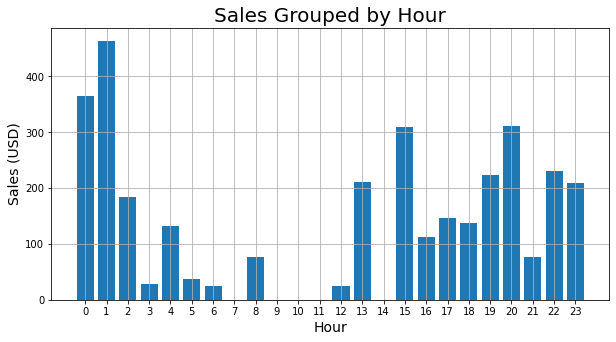

In [11]:
newdf['Created at'] = pd.to_datetime(newdf['Created at'], utc = True)
newdf['Hour'] = newdf['Created at'].dt.hour
hours = [hour for hour, newdf in newdf.groupby('Hour')]

resultstoop = newdf.groupby('Hour').sum()

plt.figure(figsize = (10,5))
plt.bar(hours, resultstoop['Total'])
plt.xticks(np.arange(min(hours), 24))
plt.xlabel('Hour', size = 14)
plt.ylabel('Sales (USD)', size = 14)
plt.title('Sales Grouped by Hour', size = 20)
plt.grid()

# Graph of Orders by Day of Week

Text(0.5, 1.0, 'Sales Grouped by Day')

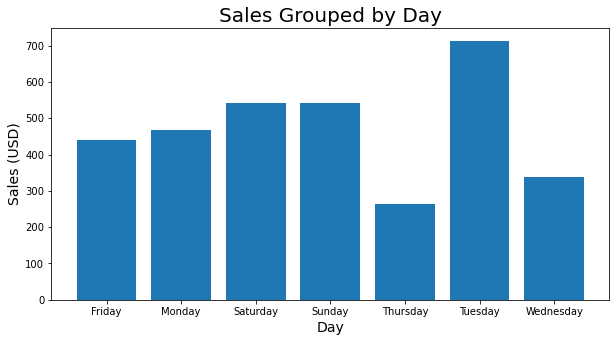

In [18]:
newdf['Created at'] = pd.to_datetime(newdf['Created at'], utc = True)
newdf['Day'] = newdf['Created at'].dt.day_name()
days = [day for day, newdf in newdf.groupby('Day')]

resultstoop = newdf.groupby('Day').sum()

plt.figure(figsize = (10,5))
plt.bar(days, resultstoop['Total'])
plt.xlabel('Day', size = 14)
plt.ylabel('Sales (USD)', size = 14)
plt.title('Sales Grouped by Day', size = 20)

In [ ]:
newdf.groupby('Day').describe()

# Average Time to Fulfill

In [ ]:
timetofulfill = (pd.to_datetime(newdf['Fulfilled at'])-pd.to_datetime(newdf['Created at'])).dropna()

timetofulfill.describe()

# Average Sale per Type of Clothing

## All Types

##### Average Price

In [ ]:
newdf['Total'].mean()

##### Number Sold

In [ ]:
newdf['Lineitem name'].count()

##### Total Revenue

In [ ]:
newdf['Total'].sum()

## Hat

### Current Price

In [21]:
from bs4 import BeautifulSoup
import requests

url = 'https://explorerclothing.shop/collections/spring-collection'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
price = soup.find('span', class_ = 'price-item price-item--regular').text

print(price)

$12.50



##### Average Price

In [ ]:
hats = newdf[newdf['Lineitem name'].str.contains('Hat')]

hats['Total'].mean()

##### Number Sold

In [ ]:
hats['Name'].count()

##### Total Revenue

In [ ]:
hats['Total'].sum()

## Hoodie

##### Average Price

In [ ]:
hoodies = newdf[newdf['Lineitem name'].str.contains('Hoodie')]

hoodies['Total'].mean()

##### Number Sold

In [ ]:
hoodies['Name'].count()

##### Total Revenue

In [ ]:
hoodies['Total'].sum()

## Crewneck

##### Average Price

In [ ]:
crews = newdf[newdf['Lineitem name'].str.contains('Crewneck')]

crews['Total'].mean()

##### Number Sold

In [ ]:
crews['Name'].count()

##### Total Revenue

In [ ]:
crews['Total'].sum()

# Graph of Type of Clothing

In [ ]:
resultsct = newdf.groupby(['Item Type']).sum()
typeofclothing = [top for top, newdf in newdf.groupby('Item Type')]

plt.figure(figsize = (10,5))
plt.bar(typeofclothing, resultsct['Total'])
plt.xlabel('Clothing Type', size = 14)
plt.ylabel('Sales (USD)', size = 14)
plt.title('Sales by Clothing Type', size = 20)
plt.grid()
plt.show()

# Total Revenue

In [ ]:
newdf['Total'].sum()

# 10 Most Sold Products

In [ ]:
itemcount = newdf.groupby('Lineitem name').count()

itemcount['Name'].sort_values(ascending = False).head(10)

# Number of Each Size Ordered

### Small

In [ ]:
Small = newdf[newdf['Lineitem name'].str.contains(' S')].count()

Small['Name']

### Medium

In [ ]:
Medium = newdf[newdf['Lineitem name'].str.contains(' M')].count()

Medium['Name']

### Large

In [ ]:
Large = newdf[newdf['Lineitem name'].str.contains(' L')].count()

Large['Name']

### Extra Large

In [ ]:
XL = newdf[newdf['Lineitem name'].str.contains(' XL')].count()

XL['Name']

### Double Extra Large

In [ ]:
XXL = newdf[newdf['Lineitem name'].str.contains(' XXL')].count()

XXL['Name']